In [15]:
import os
import numpy as np
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

# Define the function to compute MAE
def compute_mae(image1, image2):
    return np.abs(image1 - image2).mean()

def compute_mape(image1, image2):
    return np.abs((image1 - image2) / (image1 + 1e-6)).mean() * 100

# Paths to the folders
gt_folder = "/home/PET-CT/splited_data_15k/test/B"
condition_folder = "/home/PET-CT/splited_data_15k/test/A"
# pre_folder = "results/108_CT2PET_UncerBBDM3c/LBBDM-f4/sample_to_eval/200"

dataset_name = '1218_segmented_conditional_LBBDM'

pre_folder = "/home/PET-CT/thaind/BBDM_folk/results/" + dataset_name + "/LBBDM-f4/sample_to_eval/200"
confidence_folder = "/home/PET-CT/thaind/BBDM_folk/results/" + dataset_name + "/LBBDM-f4/sample_to_eval/additional_condition"
# confidence_folder2 = "/home/PET-CT/thaind/BBDM_folk/results/" + dataset_name + "/LBBDM-f4/sample_to_eval/confidence_2"


# mode = "low_mape"
mode = "high_mape"

confidences, confidences2 = [], []
mae_scores = []
high_mae, high_mae_gts, high_mae_pds, high_mae_conditions = [], [], [], []

# Iterate through the files in the ground truth folder
for filename in os.listdir(gt_folder):
    # Make sure the file is a numpy array
    if filename.endswith(".npy"):
        # Construct the paths for the corresponding ground truth and predicted files
        try:
            gt_path = os.path.join(gt_folder, filename)
            pre_path = os.path.join(pre_folder, filename)
            confidence_path = os.path.join(confidence_folder, filename)
            # confidence_path2 = os.path.join(confidence_folder2, filename)

            # Load the images as numpy arrays
            gt_img = np.load(gt_path, allow_pickle=True)
            pre_img = np.load(pre_path, allow_pickle=True)
        except:
            continue   
        # Preprocess the predicted image
        pre_img1 = pre_img.mean(axis=-1) / 32767.0
        
        # Normalize the ground truth image
        gt_img1 = gt_img / 32767.0

        # mae = compute_mae(pre_img1, gt_img1)
        # mae_scores.append(mae * 32767)
        mape = compute_mape(1-gt_img1, 1-pre_img1)
        mae_scores.append(mape)

        # if mae * 32767 < 110  : 
        if mode == "low_mape" and mape < 90 :
            high_mae_gts.append(gt_img) 
            high_mae_pds.append(pre_img)
            high_mae_conditions.append(np.load(os.path.join(condition_folder, filename), allow_pickle=True))
            # high_mae.append(mae * 32767)
            confidences.append(np.load(confidence_path, allow_pickle= True))
            # confidences2.append(np.load(confidence_path2, allow_pickle= True))
            high_mae.append(mape)
        if mode == "high_mape" and mape > 1400: 
            high_mae_gts.append(gt_img) 
            high_mae_pds.append(pre_img)
            high_mae_conditions.append(np.load(os.path.join(condition_folder, filename), allow_pickle=True))
            # high_mae.append(mae * 32767)
            confidences.append(np.load(confidence_path, allow_pickle= True))
            # confidences2.append(np.load(confidence_path2, allow_pickle= True))
            high_mae.append(mape)

# Calculate the mean scores over all pairs
# mean_ssim = np.mean(ssim_scores)
# mean_psnr = np.mean(psnr_scores)
mean_mae = np.mean(mae_scores)

# Print the mean metrics
# print("Mean SSIM: {}".format(mean_ssim))
# print("Mean PSNR: {}".format(mean_psnr))
print("Mean MAE: {}".format(mean_mae))

Mean MAE: 701.488388136485


In [16]:
len(high_mae), len(high_mae_gts)

(18, 18)

In [17]:
np.min(mae_scores), np.max(mae_scores)

(1.0061641211809418, 1527.8648453965313)

In [18]:
import os
def create_fol(dir_path): 
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)

In [19]:
import matplotlib.pyplot as plt

import os
def visualize_high_mae_images(high_mae_gts, high_mae_pds, high_mae_conditions, confidence, save_folder):
    for i in range(len(high_mae)):
        mae = high_mae[i]

        gt_img = high_mae_gts[i]
        pre_img = high_mae_pds[i]
        condition_img = high_mae_conditions[i]
        confidence_img = confidences[i]
        # confidence_img2 = confidences2[i]

        plt.figure(figsize=(15, 5))

        # Display the ground truth image
        plt.subplot(1, 4, 1)
        plt.imshow(gt_img, cmap='gray')
        plt.title("Ground Truth")
        plt.axis('off')

        # Display the predicted image
        plt.subplot(1, 4, 2)
        plt.imshow(pre_img, cmap='gray')
        plt.title("Predicted")
        plt.axis('off')

        # Display the condition image
        plt.subplot(1, 4, 3)
        plt.imshow(condition_img, cmap='gray')
        plt.title("Condition")
        plt.axis('off')

        plt.subplot(1, 4, 4)
        plt.imshow(confidence_img, cmap='gray')
        plt.title("Additional_map")
        plt.axis('off')

        # plt.subplot(1, 5, 5)
        # plt.imshow(confidence_img2, cmap='gray')
        # plt.title("confidence_Unet2")
        # plt.axis('off')

        plt.suptitle(f"MAPE: {mae:.2f}")

        # Save the figure to the specified folder
        save_path = os.path.join(save_folder, f"mape_{mae:.2f}.png")
        plt.savefig(save_path)

        plt.close()

# Specify the folder to save the images
save_folder = "./results/visualization/" + mode + "/" + dataset_name 
create_fol(save_folder)

# Create the folder if it doesn't exist
os.makedirs(save_folder, exist_ok=True)

# Visualize and save images with high MAE
visualize_high_mae_images(high_mae_gts, high_mae_pds, high_mae_conditions, confidences, save_folder)


In [8]:
create_fol('./baddataset/train/A')
create_fol('./baddataset/train/B')
create_fol('./baddataset/val/A')
create_fol('./baddataset/val/B')

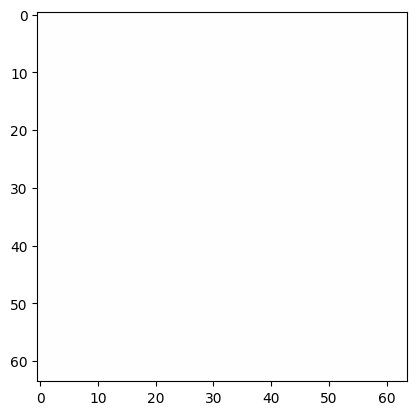

In [16]:
import shutil 
import os
import numpy as np
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

# Define the function to compute MAE
def compute_mae(image1, image2):
    return np.abs(image1 - image2).mean()

# Paths to the folders
gt_folder = "/home/PET-CT/splited_data_15k/train/B"
condition_folder = "/home/PET-CT/splited_data_15k/train/A"
# pre_folder = "results/108_CT2PET_UncerBBDM3c/LBBDM-f4/sample_to_eval/200"

dataset_name = 'UncerBBDM_1Unet_confloss_15k_training_samples_top_model'

pre_folder = "/home/PET-CT/thaind/BBDM_folk/results/" + dataset_name + "/LBBDM-f4/sample_to_eval/200"

mae_scores = []
high_mae, high_mae_gts, high_mae_pds, high_mae_conditions = [], [], [], []



# Iterate through the files in the ground truth folder
for filename in os.listdir(gt_folder):
    # Make sure the file is a numpy array
    if filename.endswith(".npy"):
        # Construct the paths for the corresponding ground truth and predicted files
        try:
            gt_path = os.path.join(gt_folder, filename)
            pre_path = os.path.join(pre_folder, filename)
        
            # Load the images as numpy arrays
            gt_img = np.load(gt_path, allow_pickle=True)
            pre_img = np.load(pre_path, allow_pickle=True)
        except:
            continue   
        # Preprocess the predicted image
        pre_img1 = pre_img.mean(axis=-1) / 32767.0
        
        # Normalize the ground truth image
        gt_img1 = gt_img / 32767.0

        mae = compute_mae(pre_img1, gt_img1)
        mae_scores.append(mae * 32767)

        if mae * 32767 > 1000  : 
            # shutil.copy(os.path.join(gt_folder, filename), os.path.join(bad_folder + '/B', filename) )
            # shutil.copy(os.path.join(condition_folder, filename), os.path.join(bad_folder + '/A', filename) )
            
            high_mae_gts.append(gt_img) 
            high_mae_pds.append(pre_img)

            high_mae_conditions.append(np.load(os.path.join(condition_folder, filename), allow_pickle=True))
            high_mae.append(mae * 32767)

# Calculate the mean scores over all pairs
# mean_ssim = np.mean(ssim_scores)
# mean_psnr = np.mean(psnr_scores)
mean_mae = np.mean(mae_scores)

# Print the mean metrics
# print("Mean SSIM: {}".format(mean_ssim))
# print("Mean PSNR: {}".format(mean_psnr))
print("Mean MAE: {}".format(mean_mae))

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

class FocalLoss(nn.Module):
    def __init__(self, gamma=0, alpha=None, size_average=True):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        if isinstance(alpha,(float,int,long)): self.alpha = torch.Tensor([alpha,1-alpha])
        if isinstance(alpha,list): self.alpha = torch.Tensor(alpha)
        self.size_average = size_average

    def forward(self, input, target):
        if input.dim()>2:
            input = input.view(input.size(0),input.size(1),-1)  # N,C,H,W => N,C,H*W
            input = input.transpose(1,2)    # N,C,H*W => N,H*W,C
            input = input.contiguous().view(-1,input.size(2))   # N,H*W,C => N*H*W,C
        target = target.view(-1,1)

        logpt = F.log_softmax(input)
        logpt = logpt.gather(1,target)
        logpt = logpt.view(-1)
        pt = Variable(logpt.data.exp())

        if self.alpha is not None:
            if self.alpha.type()!=input.data.type():
                self.alpha = self.alpha.type_as(input.data)
            at = self.alpha.gather(0,target.data.view(-1))
            logpt = logpt * Variable(at)

        loss = -1 * (1-pt)**self.gamma * logpt
        if self.size_average: return loss.mean()
        else: return loss.sum()